<h2>Calcolo della massima portata in un nodo</h2>
(E' necessario aver svolto le simulazioni per tutti i tempi di pioggia)

Si carica la libreria che consente di conoscere e scegliere la directory di lavoro

In [1]:
import os
os.getcwd()

'C:\\Users\\anzo5\\Desktop\\fognatura\\nodes'

Si interroga ora la lista dei file presenti nella nuova directory di lavoro. Se corretta sono presenti le cartelle relative alle simulazioni per ogni tempo di pioggia. (5mins, 10mins,...)

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'csv',
 'desktop.ini',
 'n01_qmax.ipynb',
 'n02_qmax.ipynb',
 'n03_qmax.ipynb',
 'n04_qmax.ipynb',
 'n10_qmax.ipynb',
 'n11_qmax.ipynb',
 'n12_qmax.ipynb',
 'n13_qmax.ipynb',
 'n14_qmax.ipynb',
 'n15_qmax.ipynb',
 'n16_qmax.ipynb',
 'n17_qmax.ipynb',
 'n18_qmax.ipynb',
 'n19_qmax.ipynb',
 'n20_qmax.ipynb',
 'n21_qmax.ipynb',
 'n22_qmax.ipynb',
 'n24_qmax.ipynb',
 'n26_qmax.ipynb',
 'n29_qmax.ipynb']

In [3]:
os.chdir('csv')
os.listdir()

['n00.csv',
 'n01.csv',
 'n02.csv',
 'n03.csv',
 'n04.csv',
 'n05.csv',
 'n06.csv',
 'n07.csv',
 'n08.csv',
 'n09.csv',
 'n10.csv',
 'n11.csv',
 'n12.csv',
 'n13.csv',
 'n14.csv',
 'n15.csv',
 'n16.csv',
 'n17.csv',
 'n18.csv',
 'n19.csv',
 'n20.csv',
 'n21.csv',
 'n22.csv',
 'n23.csv',
 'n24.csv',
 'n25.csv',
 'n26.csv',
 'n27.csv',
 'n28.csv',
 'n29.csv']

Finalmente si importa la libreria "pandas"

In [4]:
from pandas import *
import pandas as pd
import datetime as datetime


Si legge il file csv del nodo contenente le portate nel tempo per i diversi tempi di pioggia, usando il comando di panda <code>read_csv</code>

In [6]:
pd.options.display.max_rows = 20
node = pd.read_csv('n29.csv')
map(datetime, node['time'])
node = node.set_index('time')
node

,5min,10min,15min,20min,25min
time,,,,,
00:00:30,0.008261,0.003588,0.002158,0.001485,0.001101
00:01:00,0.018421,0.007861,0.004692,0.003218,0.002380
00:01:30,0.038801,0.016937,0.010327,0.007225,0.005446
00:02:00,0.065967,0.028702,0.017529,0.012233,0.009236
00:02:30,0.100486,0.043879,0.026821,0.018881,0.014329
00:03:00,0.145296,0.063394,0.038691,0.027169,0.020595
00:03:30,0.196036,0.086007,0.052619,0.036971,0.028042
00:04:00,0.256606,0.113611,0.069663,0.048987,0.037190
00:04:30,0.320459,0.143585,0.088440,0.062348,0.047384


Finalmente visualizziamo i dati con matplotlib. Il secondo comando, preceduto da "%" consente di visualizzare automaticamente sullo schermo il risultato grafico. 

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline 

Si visualizzano le curve di portata rispetto all'andamento nel tempo per un controllo ulteriore

In [8]:
all=node[['5min','10min', '15min', '20min', '25min']]

[]

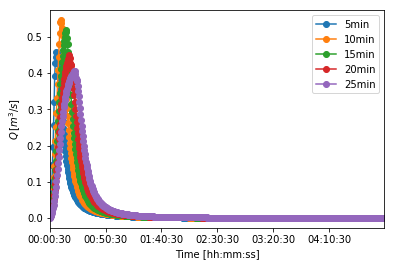

In [9]:
ax = all.plot(style="-o")
ax.set_xlabel('Time [hh:mm:ss]')
ax.set_ylabel(r'$Q\,\left[m^3/s\right]$')
ax.plot()

Si valuta il valore massimo di portata tra i massimi ottenuti per tempi diversi di pioggia e il relativo tempo critico

In [10]:
n_t1 = node['5min']
n_t2 = node['10min']
n_t3 = node['15min']
n_t4 = node['20min']
n_t5 = node['25min']

In [11]:
maxValues = [n_t1.max(), n_t2.max(), n_t3.max(), n_t4.max(), n_t5.max()]
maxValues

[0.45695699999999995, 0.545944, 0.519262, 0.449226, 0.406384]

Il valore massimo tra i tempi è $Q_{max}$ e vale

In [12]:
maxValue = max(maxValues)
maxValue

0.545944

cioè, in litri

In [14]:
maxValue * 1000

545.944

La sua posizione nel file dei massimi è:

In [15]:
maxValues.index(maxValue)

1

cioè è causata dalla precipitazione di **10min**.

Ora ci proponiamo di trovare il tempo in cui il massimo si realizza. Per fare questo dobbiamo considerare il primo dataFrame.

In [16]:
mask=(n_t2==n_t2.max())

In [17]:
n_t2[mask]

time
00:10:30    0.545944
Name: 10min, dtype: float64

Il tempo di pioggia critico risulta:

In [18]:
n_t2[mask].index

Index(['00:10:30'], dtype='object', name='time')

---